Let's play now with Titanic data! 
https://www.kaggle.com/c/titanic/data

First read files for the training and testing sets and load them into a dataframe. 

In [11]:
import pandas as pd
df_train = pd.read_csv('data/titanic/train.csv')
df_test = pd.read_csv('data/titanic/test.csv')

What are the columns of the dataframe? 

In [12]:
print(df_train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


What is the size for each set? 

In [13]:
print('Training size:', df_train.shape[0], 'Testing size:', df_test.shape[0])

Training size: 891 Testing size: 418


How much missing values each set has? 

In [14]:
print(df_train.isnull().sum(),'\n\n', df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Plot the distribution of the variable Age for the non-missing values.

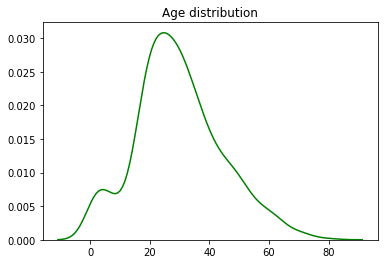

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.kdeplot(df_train[~df_train['Age'].isnull()]['Age'].values, color='green')
plt.title('Age distribution')
plt.show()

Simulate the Age variable from a normal distribution from the information available. And fill the missing values choosing randomly from this distribution. 

In [16]:
import numpy as np
import random

age_train = np.random.normal(df_train['Age'].mean(), df_train['Age'].std(), df_train['Age'].isnull().sum())
df_train.fillna({'Age':random.choice(age_train)}, inplace=True)

Drop the Cabin variable since it has too many NAs. Drop other variables not important for the analysis.

In [18]:
df_train.drop(['PassengerId','Cabin','Ticket','Name'], axis=1, inplace=True)
df_test.drop(['PassengerId','Cabin','Ticket','Name'], axis=1, inplace=True)

Drop NAs if there is any from the test set

In [6]:
df_test.dropna(inplace=True)

Transform categorical variables

In [19]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Embarked'])], axis=1)
df_train = pd.concat([df_train, pd.get_dummies(df_train['Sex'], drop_first=True)], axis=1)
df_train.drop(['Embarked','Sex'], axis=1, inplace=True)

df_test = pd.concat([df_test, pd.get_dummies(df_test['Embarked'])], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['Sex'], drop_first=True)], axis=1)
df_test.drop(['Embarked'], axis=1, inplace=True)

Now, show the first rows of the cleaned dataset 

In [20]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,male
0,0,3,22.0,1,0,7.2500,0,0,1,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,1


Now it is time to make the prediction!. Use a DecisionTreeClassifier from sklearn library to predict if the person will survive or not. So, use 'Survived' as your target variable. 

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

x = df_train.drop(["Survived"], axis=1)
y = df_train["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                  test_size = 20, random_state = 0)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

What is the accuracy of your model? 

In [23]:
accuracy = accuracy_score(y_pred, y_test, normalize=True)
accuracy

0.8

What is the confusion matrix? What is the meaning?

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[7, 2],
       [2, 9]])

It means that: 
- TN=7: The rows classified correctly as 0
- FP=2: The rows classified incorrectly as 1
- FN=2: The rows classified incorrectly as 0
- TP: The rows classified correctly as 1 

In [26]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(7, 2, 2, 9)